In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import matplotlib as mpl

In [10]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
df_loc = df.iloc[:,[0,2,17,18]]
df_loc

,id,price,lat,long
0,7129300520,221900.0,47.5112,-122.257
1,6414100192,538000.0,47.7210,-122.319
2,5631500400,180000.0,47.7379,-122.233
3,2487200875,604000.0,47.5208,-122.393
4,1954400510,510000.0,47.6168,-122.045
...,...,...,...,...
21608,263000018,360000.0,47.6993,-122.346
21609,6600060120,400000.0,47.5107,-122.362
21610,1523300141,402101.0,47.5944,-122.299
21611,291310100,400000.0,47.5345,-122.069


In [ ]:
!pip install basemap

In [ ]:
!pip install basemap-data-hires

In [13]:
from mpl_toolkits.basemap import Basemap

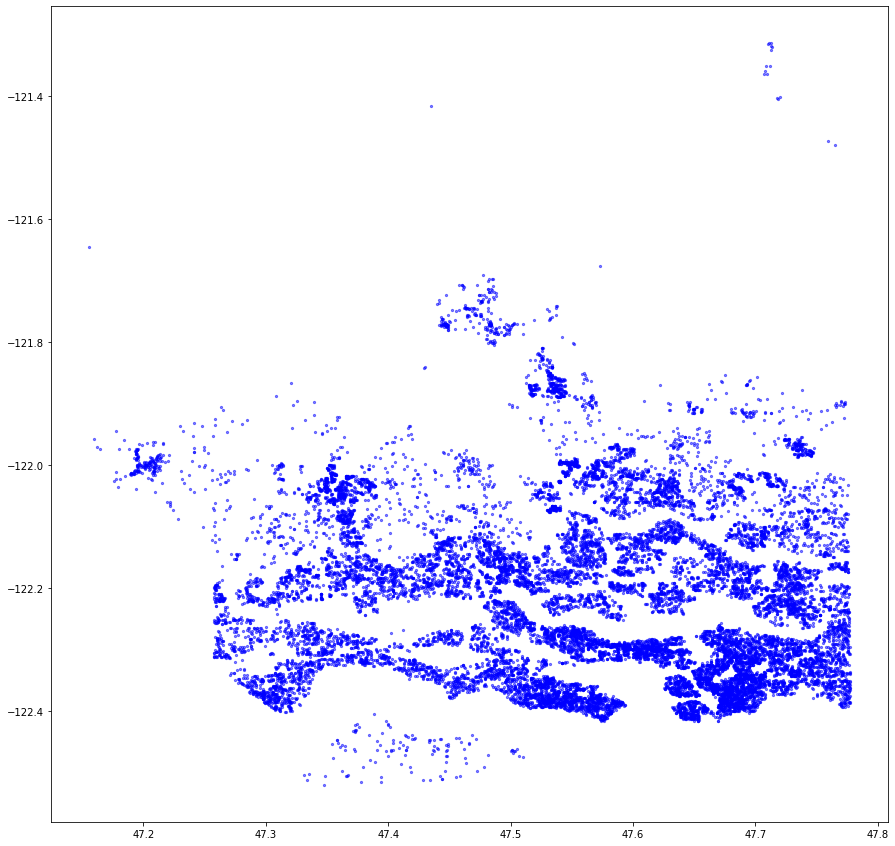

In [14]:
plt.figure(figsize=(15,15))
plt.scatter(df_loc['lat'].values, df_loc['long'].values, s= 5, c='blue', alpha=0.5, zorder=5)

In [66]:
def plot_map(lat1, lat2, lon1, lon2, xmap, ymap):
    plt.figure(figsize = (xmap, ymap))
    map = Basemap(projection='cyl', resolution='f',
                  llcrnrlat=lat1, urcrnrlat=lat2,
                  llcrnrlon=lon1, urcrnrlon=lon2) 
    map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
    #map.drawcoastlines()
    #map.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
    #map.drawmapboundary(fill_color='lightskyblue') 
    map.drawparallels(np.arange(lat1, lat2 +0.5,2), labels=[1,0,0,0])
    map.drawmeridians(np.arange(lon1, lon2 +0.5,2), labels=[0,0,0,1])
    return map


In [67]:
multiplot = 0.05
lat1= df_loc['lat'].min() - multiplot if df_loc['lat'].min() < 0 else df_loc['lat'].min() + multiplot
lat2= df_loc['lat'].max() - multiplot if df_loc['lat'].max() < 0 else df_loc['lat'].max() + multiplot
lon1= df_loc['long'].min() - multiplot if df_loc['long'].min() < 0 else df_loc['long'].min() + multiplot
lon2= df_loc['long'].max() - multiplot if df_loc['long'].max() < 0 else df_loc['long'].max() + multiplot

lat1, lat2 = round(lat1, 4), round(lat2, 4)
lon1, lon2 = round(lon1, 4), round(lon2, 4)

print(df_loc['lat'].min(),df_loc['lat'].max())
print(lat1, lat2)
print(df_loc['long'].min(), df_loc['long'].max())
print(lon1, lon2)

47.1559 47.7776
47.2059 47.8276
-122.519 -121.315
-122.569 -121.365


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-122.569,47.2059,-121.36500000000001,47.8276&bboxSR=4326&imageSR=4326&size=1500,774&dpi=96&format=png32&transparent=true&f=image


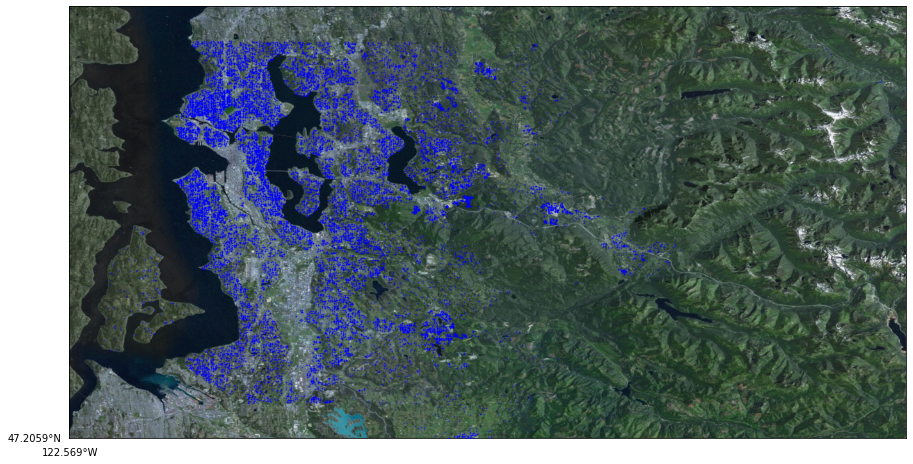

In [69]:
map = plot_map(lat1, lat2, lon1, lon2, 15, 15)
map.scatter(df_loc['long'].values, df_loc['lat'].values, s= 0.5, c='blue', alpha=0.4 , zorder=5)

Utilizando Kmeans

In [24]:
from sklearn.cluster import KMeans

In [145]:
km = KMeans(n_clusters=10) 
km.fit(X_df)

KMeans(n_clusters=10)

In [146]:
cent = km.cluster_centers_
cent

array([[  47.70406611, -122.18725451],
       [  47.51637048, -122.17621247],
       [  47.51857293, -121.81718949],
       [  47.68896219, -122.3368686 ],
       [  47.33860841, -122.32397235],
       [  47.53606432, -122.33565292],
       [  47.33557913, -122.03415336],
       [  47.36212181, -122.17992773],
       [  47.58600411, -122.05165   ],
       [  47.70774634, -122.01737327]])

In [147]:
rot = km.labels_
rot

array([1, 3, 0, ..., 5, 8, 5], dtype=int32)

In [54]:
import plotly.graph_objects as go

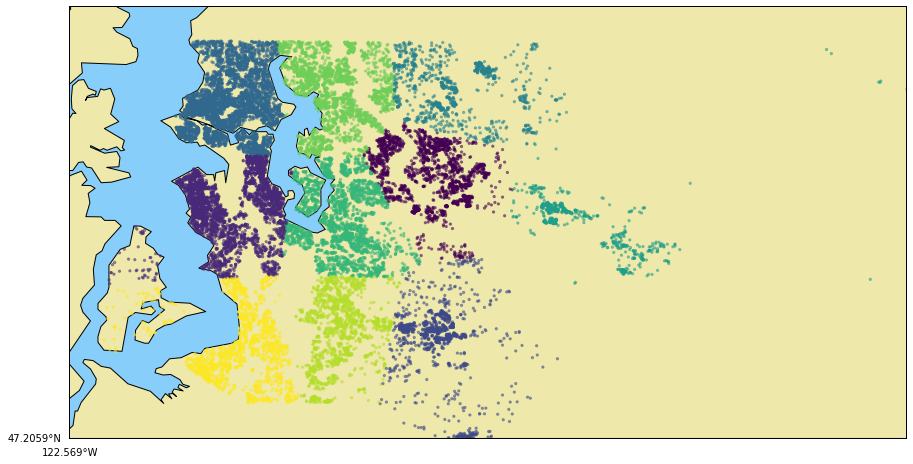

In [55]:
map = plot_map(lat1, lat2, lon1, lon2, 15, 10)
map.scatter(df_loc['long'].values, df_loc['lat'].values, s= 5, c= rot, alpha=0.5 , zorder=5)


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-122.569,47.2059,-121.36500000000001,47.8276&bboxSR=4326&imageSR=4326&size=1500,774&dpi=96&format=png32&transparent=true&f=image


AttributeError: ignored

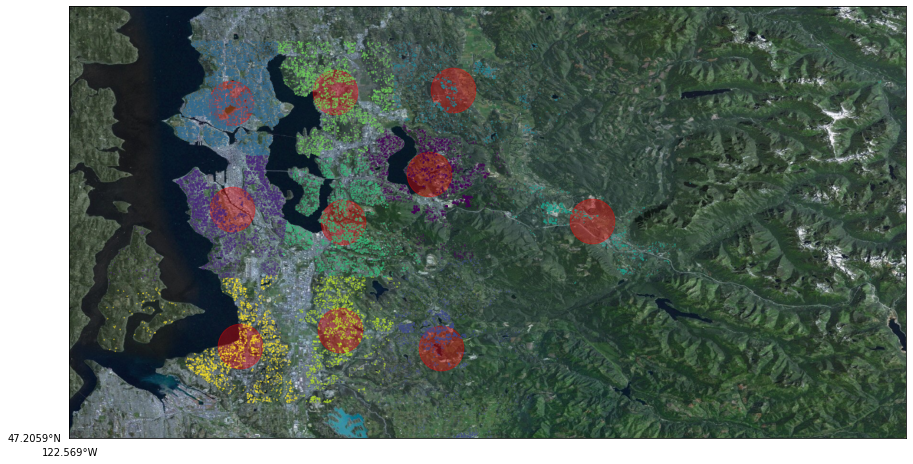

In [70]:
map = plot_map(lat1, lat2, lon1, lon2, 15, 10)
graf1 = map.scatter(x =cent[:,1],y= cent[:,0], s= 2000, c= 'red', alpha=0.35 , zorder=5)
graf2 = map.scatter(df_loc['long'].values, df_loc['lat'].values, s= 0.5, c= rot, alpha=0.4 , zorder=5)
graf3 =  go.Figure(data=graf1.data + graf2.data)
graf3.show()

In [71]:
km = KMeans(n_clusters=43) 
km.fit(X_df)

KMeans(n_clusters=43)

In [ ]:
cent = km.cluster_centers_
cent

In [73]:
rot = km.labels_
rot

array([20, 16, 29, ...,  7, 40,  7], dtype=int32)

In [ ]:
map = plot_map(lat1, lat2, lon1, lon2, 15, 10)
graf1 = map.scatter(x =cent[:,1],y= cent[:,0], s= 2000, c= 'red', alpha=0.35 , zorder=5)
graf2 = map.scatter(df_loc['long'].values, df_loc['lat'].values, s= 0.5, c= rot, alpha=0.4 , zorder=5)
graf3 =  go.Figure(data=graf1.data + graf2.data)
graf3.show()

In [148]:
tab = np.unique(rot, return_counts=True)

<BarContainer object of 10 artists>

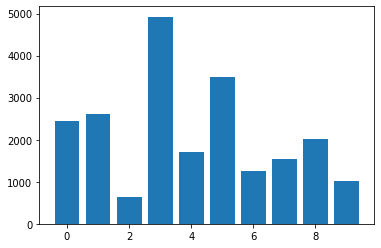

In [149]:
plt.bar(tab[0], tab[1])

In [150]:
tabelac= []
tabelac = tab[0]

In [151]:
tabelac = tabelac.astype(str)

In [152]:
tabelaq = []
tabelaq = tab[1]

In [153]:
tabelaq

array([2442, 2600,  628, 4924, 1698, 3499, 1264, 1543, 2007, 1008])

In [154]:
tabelaf = pd.DataFrame()

In [155]:
tabelaf['Corretor'] = tabelac

In [156]:
tabelaf['Quantidade']= tabelaq

In [157]:
tabelaf['Corretor'] = tabelaf['Corretor'].astype(str)

In [158]:
tabelaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Corretor    10 non-null     object
 1   Quantidade  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [159]:
graficot = tabelaf.Quantidade.sort_values(ascending=(False))

In [160]:
graficot.index = graficot.index.astype(str)

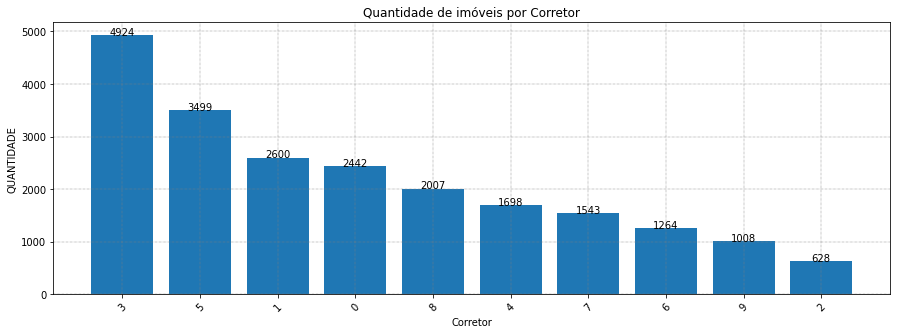

In [161]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

x= graficot.index
y= graficot.values




plt.figure(figsize=(15,5))
# plt.bar(cat, valores)
plt.grid(True, color = "grey", linewidth = "0.4", linestyle = "-.")
plt.bar(graficot.index, graficot.values)
addlabels(x, y)
plt.xlabel('Corretor')
plt.ylabel('QUANTIDADE')
plt.xticks(rotation=(45))
plt.title('Quantidade de imóveis por Corretor');
# plt.savefig('Gráfico Itens-Grupo.png', format='png')

In [162]:
df_loc

,id,price,lat,long
0,7129300520,221900.0,47.5112,-122.257
1,6414100192,538000.0,47.7210,-122.319
2,5631500400,180000.0,47.7379,-122.233
3,2487200875,604000.0,47.5208,-122.393
4,1954400510,510000.0,47.6168,-122.045
...,...,...,...,...
21608,263000018,360000.0,47.6993,-122.346
21609,6600060120,400000.0,47.5107,-122.362
21610,1523300141,402101.0,47.5944,-122.299
21611,291310100,400000.0,47.5345,-122.069


In [163]:
df_loc.price.isnull().sum()

0

In [168]:
df_loc.price.min(), df_loc.price.mean(), df_loc.price.max()

(75000.0, 540088.1417665294, 7700000.0)

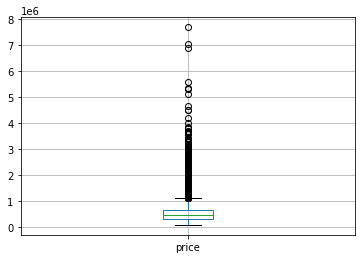

In [170]:
df_loc.boxplot(column=['price'])

In [174]:
df_loc.price.describe() # 75000 # 320000 # 450000 #645000 #7700000

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [175]:
faixa = []
for preco in df_loc.price:
    if preco < 75000:
        faixa.append(0)
    elif preco >= 75000 and preco < 320000:
        faixa.append(1)
    elif preco >= 320000 and preco < 450000:
        faixa.append(2)
    elif preco >= 450000 and preco < 645000:
        faixa.append(3)
    else:
        faixa.append(4)

In [ ]:
faixa

In [177]:
df_loc['Faixa'] = faixa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
df_loc

,id,price,lat,long,Faixa
0,7129300520,221900.0,47.5112,-122.257,1
1,6414100192,538000.0,47.7210,-122.319,3
2,5631500400,180000.0,47.7379,-122.233,1
3,2487200875,604000.0,47.5208,-122.393,3
4,1954400510,510000.0,47.6168,-122.045,3
...,...,...,...,...,...
21608,263000018,360000.0,47.6993,-122.346,2
21609,6600060120,400000.0,47.5107,-122.362,2
21610,1523300141,402101.0,47.5944,-122.299,2
21611,291310100,400000.0,47.5345,-122.069,2


In [186]:
rotu = df_loc.Faixa.values

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-122.569,47.2059,-121.36500000000001,47.8276&bboxSR=4326&imageSR=4326&size=1500,774&dpi=96&format=png32&transparent=true&f=image


No handles with labels found to put in legend.


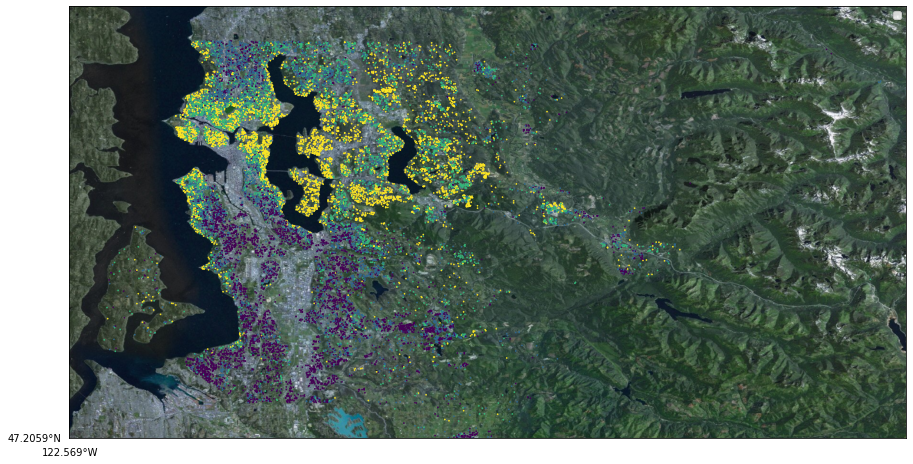

In [194]:
map = plot_map(lat1, lat2, lon1, lon2, 15, 15)
map.scatter(df_loc['long'].values, df_loc['lat'].values, s= 0.5, c=rotu, alpha=0.9 , zorder=5)
plt.legend()